- [Main Code](#main-code)
- [Step by step code flow](step-by-step-code-flow)

### Main Code

In [34]:
import sys
import torch
from torch import nn
import pandas as pd

df = pd.read_csv("./data/student_exam_data.csv")

X = torch.tensor(
    df[["Study Hours", "Previous Exam Score"]].values, 
    dtype=torch.float32
)
y = torch.tensor(df["Pass/Fail"], dtype=torch.float32)\
    .reshape((-1, 1))

model = nn.Sequential(
    nn.Linear(2, 10),
    nn.ReLU(),
    nn.Linear(10, 1)
)

loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

num_entries = X.size(0)
batch_size = 32

# print(X[32:64])
#for start in range(0, num_entries, batch_size):
#    end = min(num_entries, start + batch_size)
#    print("start: ", start, "end: ", end)

for i in range(0, 1000):
    for start in range(0, num_entries, batch_size):
        end = min(num_entries, start + batch_size)
        X_data = X[start:end]
        y_data = y[start:end]

        optimizer.zero_grad()
        outputs = model(X_data)
        loss = loss_fn(outputs, y_data)
        loss.backward()
        optimizer.step()

    if i % 10 == 0:
        print(loss)

model.eval()
with torch.no_grad():
    outputs = model(X)
    y_pred = nn.functional.sigmoid(outputs) > 0.5
    y_pred_correct = y_pred.type(torch.float32) == y
    print(y_pred_correct.type(torch.float32).mean())

tensor(1.3562, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.7025, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.6603, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.6197, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.5811, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.5445, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.5102, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.4794, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.4538, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.4334, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.4173, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.4050, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.3962, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.3904, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.3869, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.3852, grad_fn=<BinaryCrossEntro

### Step by step code flow

First explore the data

In [2]:
import pandas as pd

df = pd.read_csv("./data/student_exam_data.csv")
df.head()

,Study Hours,Previous Exam Score,Pass/Fail
0,4.370861,81.889703,0
1,9.556429,72.165782,1
2,7.587945,58.571657,0
3,6.387926,88.827701,1
4,2.404168,81.083870,0


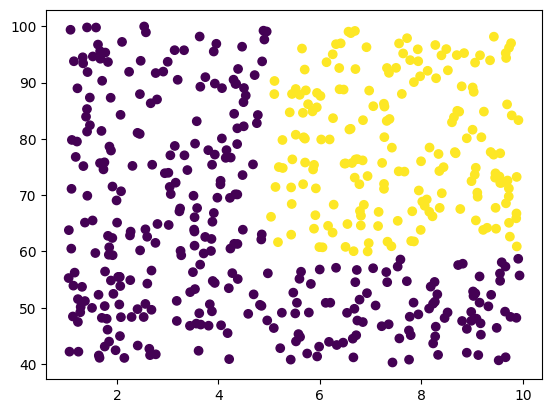

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(df["Study Hours"], df["Previous Exam Score"], c=df["Pass/Fail"])
plt.show()

1st lets develop a basic neuron for this problem

In [6]:
import torch
from torch import nn
import pandas as pd

df = pd.read_csv("./data/student_exam_data.csv")

In [9]:
# X = torch.tensor(
#     df[["Study Hours", "Previous Exam Score"]], 
#     dtype=torch.float32
# ) # This will throw an error. 

X = torch.tensor(
    df[["Study Hours", "Previous Exam Score"]].values, 
    dtype=torch.float32
)

In [10]:
y = torch.tensor(df["Pass/Fail"], dtype=torch.float32)\
    .reshape((-1, 1))

In [11]:
model = nn.Linear(2, 1)
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.005)

In [13]:
for i in range(0, 500000):
    optimizer.zero_grad()
    outputs = model(X)
    loss = loss_fn(outputs, y)
    loss.backward()
    optimizer.step()

    if i % 10000 == 0:
        print(loss)

tensor(0.3114, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.3114, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.3114, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.3114, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.3114, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.3114, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.3114, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.3114, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.3114, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.3114, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.3114, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.3114, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.3114, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.3114, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.3114, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.3114, grad_fn=<BinaryCrossEntro

Let's predict the data

In [14]:
model.eval()
with torch.no_grad():
    # y_pred = model(X) > 0.5  # General process
    y_pred = nn.functional.sigmoid(model(X)) > 0.5 # As we are using sigmoid function for the loss function. And if the prediction values are >0.5, then they are true
    y_pred_correct = y_pred.type(torch.float32) == y
    print(y_pred_correct.type(torch.float32).mean())

tensor(0.8620)


Lets see whether we can see the accuracy will implement with 2 neurons(neuron network)

2 Inputs\
10 neurons in the hidden layer\
1 output neuron

In [20]:
import sys
import torch
from torch import nn
import pandas as pd

df = pd.read_csv("./data/student_exam_data.csv")

X = torch.tensor(
    df[["Study Hours", "Previous Exam Score"]].values, 
    dtype=torch.float32
)
y = torch.tensor(df["Pass/Fail"], dtype=torch.float32)\
    .reshape((-1, 1))

hidden_model = nn.Linear(2, 10) 
output_model = nn.Linear(10, 1)
loss_fn = torch.nn.BCEWithLogitsLoss()
print(list(hidden_model.parameters()))
print(list(output_model.parameters()))
parameters = list(hidden_model.parameters()) + list(output_model.parameters())
optimizer = torch.optim.SGD(parameters, lr=0.005) # Because we we want to include all the model parameters for the training

for i in range(0, 500000):
    optimizer.zero_grad()
    outputs = hidden_model(X)
    outputs = nn.functional.sigmoid(outputs)
    outputs = output_model(outputs)
    loss = loss_fn(outputs, y)
    loss.backward()
    optimizer.step()

    if i % 10000 == 0:
        print(loss)

# sys.exit()

#model.eval()
#with torch.no_grad():
#    y_pred = nn.functional.sigmoid(model(X)) > 0.5
#    y_pred_correct = y_pred.type(torch.float32) == y
#    print(y_pred_correct.type(torch.float32).mean())


[Parameter containing:
tensor([[ 0.6969,  0.1763],
        [-0.7007, -0.6536],
        [ 0.5988,  0.6469],
        [-0.6032, -0.5065],
        [-0.0092,  0.5928],
        [-0.3321,  0.6039],
        [-0.6984,  0.3238],
        [-0.2705,  0.0365],
        [-0.6448,  0.6179],
        [ 0.4980, -0.2475]], requires_grad=True), Parameter containing:
tensor([ 0.3914, -0.0063, -0.3041,  0.3600,  0.0239,  0.6436,  0.5385, -0.3206,
         0.3436,  0.6633], requires_grad=True)]
[Parameter containing:
tensor([[-0.1123,  0.1467, -0.2216,  0.1328,  0.3044, -0.0273,  0.0217, -0.2994,
          0.1288,  0.2932]], requires_grad=True), Parameter containing:
tensor([-0.1915], requires_grad=True)]
tensor(0.6629, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.4910, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.4580, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.4463, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.4395, grad_fn=<BinaryCrossEntropyWithLogitsBa

SystemExit: 

C:\Users\gta\env\Lib\site-packages\IPython\core\interactiveshell.py:3707: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


Now do the prediction

In [19]:
import sys
import torch
from torch import nn
import pandas as pd

df = pd.read_csv("./data/student_exam_data.csv")

X = torch.tensor(
    df[["Study Hours", "Previous Exam Score"]].values, 
    dtype=torch.float32
)
y = torch.tensor(df["Pass/Fail"], dtype=torch.float32)\
    .reshape((-1, 1))

hidden_model = nn.Linear(2, 10)
output_model = nn.Linear(10, 1)
loss_fn = torch.nn.BCEWithLogitsLoss()
parameters = list(hidden_model.parameters()) + list(output_model.parameters())
optimizer = torch.optim.SGD(parameters, lr=0.005)

for i in range(0, 500000):
    optimizer.zero_grad()
    outputs = hidden_model(X)
    outputs = nn.functional.sigmoid(outputs)
    outputs = output_model(outputs)
    loss = loss_fn(outputs, y)
    loss.backward()
    optimizer.step()

    if i % 10000 == 0:
        print(loss)

hidden_model.eval()
output_model.eval()
with torch.no_grad():
    # y_pred = nn.functional.sigmoid(model(X)) > 0.5
    
    outputs = hidden_model(X)
    outputs = nn.functional.sigmoid(outputs)
    outputs = output_model(outputs)
    
    y_pred = nn.functional.sigmoid(outputs) > 0.5
    y_pred_correct = y_pred.type(torch.float32) == y
    print(y_pred_correct.type(torch.float32).mean())

tensor(0.8516, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.6429, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.4700, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.3594, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.2970, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.2399, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.2158, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.1921, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.1721, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.1551, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.1404, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.1276, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.1163, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.1063, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.0975, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.0896, grad_fn=<BinaryCrossEntro

Use nn.Sequential to make the code easier. Simplifies model architecture by allowing layers and functions to be defined in single and orderly sequence

In [21]:
import sys
import torch
from torch import nn
import pandas as pd

df = pd.read_csv("./data/student_exam_data.csv")

X = torch.tensor(
    df[["Study Hours", "Previous Exam Score"]].values, 
    dtype=torch.float32
)
y = torch.tensor(df["Pass/Fail"], dtype=torch.float32)\
    .reshape((-1, 1))

model = nn.Sequential(
    nn.Linear(2, 10),
    nn.Sigmoid(),
    nn.Linear(10, 1)
)
print(model)

loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.005)

for i in range(0, 500000):
    optimizer.zero_grad()
    outputs = model(X)
    loss = loss_fn(outputs, y)
    loss.backward()
    optimizer.step()

    if i % 10000 == 0:
        print(loss)

model.eval()
with torch.no_grad():
    outputs = model(X)
    y_pred = nn.functional.sigmoid(outputs) > 0.5
    y_pred_correct = y_pred.type(torch.float32) == y
    print(y_pred_correct.type(torch.float32).mean())


Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=10, out_features=1, bias=True)
)
tensor(0.8229, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.4615, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.3683, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.3258, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.2896, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.2702, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.2113, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.1872, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.1962, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.1689, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.1462, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.1381, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.1247, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.1135, grad_fn=

Lets explore how we can do this using ReLu activation function instead of sigmoid function

In [22]:
import sys
import torch
from torch import nn
import pandas as pd

df = pd.read_csv("./data/student_exam_data.csv")

X = torch.tensor(
    df[["Study Hours", "Previous Exam Score"]].values, 
    dtype=torch.float32
)
y = torch.tensor(df["Pass/Fail"], dtype=torch.float32)\
    .reshape((-1, 1))

model = nn.Sequential(
    nn.Linear(2, 10),
    nn.ReLU(),
    nn.Linear(10, 1)
)
print(model)

loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.005)

for i in range(0, 500000):
    optimizer.zero_grad()
    outputs = model(X)
    loss = loss_fn(outputs, y)
    loss.backward()
    optimizer.step()

    if i % 10000 == 0:
        print(loss)

model.eval()
with torch.no_grad():
    outputs = model(X)
    y_pred = nn.functional.sigmoid(outputs) > 0.5 # We need to use sigmoid here regardless of activation function, as we need 0 or 1 as output.
    y_pred_correct = y_pred.type(torch.float32) == y
    print(y_pred_correct.type(torch.float32).mean())

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
)
tensor(8.4902, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.2303, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.1571, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.1779, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.1404, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.1113, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.0944, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.0858, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.0761, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.0696, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.0622, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.0591, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.0532, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.3384, grad_fn=<Bi

| Feature | SGD (Stochastic Gradient Descent) | Adam (Adaptive Moment Estimation) |
|---|---|---|
| Learning Rate | Global, often requires manual tuning and schedules. | Adaptive, per-parameter learning rates based on past gradients. |
| Hyperparameters | Primarily learning rate (and momentum if used). | Learning rate, beta1, beta2 (decay rates for moment estimates). |
| Memory Usage | Lower, stores only gradients and (optionally) momentum buffers. | Higher, stores first and second moment estimates for each parameter. |
| Convergence | Can be slower, prone to oscillations, but can achieve good generalization. | Generally faster, smoother convergence, but sometimes struggles with generalization. |
| Complexity | Simpler algorithm. | More complex, involves moment estimation and bias correction. |


Let's move to Adam

In [23]:
import sys
import torch
from torch import nn
import pandas as pd

df = pd.read_csv("./data/student_exam_data.csv")

X = torch.tensor(
    df[["Study Hours", "Previous Exam Score"]].values, 
    dtype=torch.float32
)
y = torch.tensor(df["Pass/Fail"], dtype=torch.float32)\
    .reshape((-1, 1))

model = nn.Sequential(
    nn.Linear(2, 10),
    nn.ReLU(),
    nn.Linear(10, 1)
)
print(model)

loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for i in range(0, 500000):
    optimizer.zero_grad()
    outputs = model(X)
    loss = loss_fn(outputs, y)
    loss.backward()
    optimizer.step()

    if i % 10000 == 0:
        print(loss)

model.eval()
with torch.no_grad():
    outputs = model(X)
    y_pred = nn.functional.sigmoid(outputs) > 0.5
    y_pred_correct = y_pred.type(torch.float32) == y
    print(y_pred_correct.type(torch.float32).mean())

Sequential(
  (0): Linear(in_features=2, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
)
tensor(2.8533, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.2691, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.2691, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.0011, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.0003, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(9.0203e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.0003, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(6.9677e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(3.4040e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(1.9503e-05, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(1.3061e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(9.6542e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(4.9879e-06, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>

Everytime, we are calculating the loss on the whole training data.\
What if data is not fitting into the memory?\
Do we have to always run gradient descent on all data?

So we are moving into Mini-batch learning:
- We split data into smaller chunks, For example: 32 or 64.
- And train with these chunks, one chunk at a time
- For the same amount of compute, we can do significantly more steps

In [32]:
import sys
import torch
from torch import nn
import pandas as pd

df = pd.read_csv("./data/student_exam_data.csv")

X = torch.tensor(
    df[["Study Hours", "Previous Exam Score"]].values, 
    dtype=torch.float32
)
y = torch.tensor(df["Pass/Fail"], dtype=torch.float32)\
    .reshape((-1, 1))

model = nn.Sequential(
    nn.Linear(2, 10),
    nn.ReLU(),
    nn.Linear(10, 1)
)

loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

num_entries = X.size(0)
batch_size = 32

# print(X[32:64])
#for start in range(0, num_entries, batch_size):
#    end = min(num_entries, start + batch_size)
#    print("start: ", start, "end: ", end)

for i in range(0, 1000):
    for start in range(0, num_entries, batch_size):
        end = min(num_entries, start + batch_size)
        X_data = X[start:end]
        y_data = y[start:end]

        optimizer.zero_grad()
        outputs = model(X_data)
        loss = loss_fn(outputs, y_data)
        loss.backward()
        optimizer.step()

    if i % 10 == 0:
        print(loss)

model.eval()
with torch.no_grad():
    outputs = model(X)
    y_pred = nn.functional.sigmoid(outputs) > 0.5
    y_pred_correct = y_pred.type(torch.float32) == y
    print(y_pred_correct.type(torch.float32).mean())


tensor(0.7165, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.6662, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.6172, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.5742, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.5359, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.5021, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.4729, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.4486, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.4291, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.4138, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.4023, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.3937, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.3876, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.3833, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.3805, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
tensor(0.3788, grad_fn=<BinaryCrossEntro

Now we are optimising loss training

In [33]:
import sys
import torch
from torch import nn
import pandas as pd

df = pd.read_csv("./data/student_exam_data.csv")

X = torch.tensor(
    df[["Study Hours", "Previous Exam Score"]].values, 
    dtype=torch.float32
)
y = torch.tensor(df["Pass/Fail"], dtype=torch.float32)\
    .reshape((-1, 1))

model = nn.Sequential(
    nn.Linear(2, 10),
    nn.ReLU(),
    nn.Linear(10, 1)
)

loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.005)

num_entries = X.size(0)
batch_size = 32

# print(X[32:64])
#for start in range(0, num_entries, batch_size):
#    end = min(num_entries, start + batch_size)
#    print("start: ", start, "end: ", end)

for i in range(0, 1000):
    loss_sum = 0
    for start in range(0, num_entries, batch_size):
        end = min(num_entries, start + batch_size)
        X_data = X[start:end]
        y_data = y[start:end]

        optimizer.zero_grad()
        outputs = model(X_data)
        loss = loss_fn(outputs, y_data)
        loss.backward()
        loss_sum += loss.item()
        optimizer.step()

    if i % 10 == 0:
        print(loss_sum)

model.eval()
with torch.no_grad():
    outputs = model(X)
    y_pred = nn.functional.sigmoid(outputs) > 0.5
    y_pred_correct = y_pred.type(torch.float32) == y
    print(y_pred_correct.type(torch.float32).mean())

12.88355815410614
9.723077595233917
9.081547170877457
8.488600939512253
7.946475803852081
7.454595267772675
7.013854891061783
6.625451147556305
6.289111763238907
6.002330034971237
5.760704457759857
5.55876624584198
5.390796601772308
5.2513850927352905
5.135711967945099
5.039642721414566
4.9597155302762985
4.89306828379631
4.8373531103134155
4.7906531393527985
4.751409083604813
4.718337520956993
4.690405398607254
4.666752114892006
4.646678045392036
4.6296021938323975
4.615051761269569
4.602625727653503
4.591999173164368
4.5828952342271805
4.5750856548547745
4.568375691771507
4.562603935599327
4.55763179063797
4.553346619009972
4.549649149179459
4.54645448923111
4.543692842125893
4.541303068399429
4.53923624753952
4.537441253662109
4.535886466503143
4.534534886479378
4.533362373709679
4.5323425978422165
4.531453803181648
4.530681163072586
4.53000433743
4.529413864016533
4.528895229101181
4.52844101190567
4.52804034948349
4.527687460184097
4.527374505996704
4.527094453573227
4.52684564888